<a href="https://colab.research.google.com/github/Saddam705/hotl-booking-analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

#lets analysis the basic things

In [ ]:
#importing necessery libraries for future analysis of the dataset.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#using pandas libray lets access the hotel booking file and show some rows and columns.
df = pd.read_csv("/content/drive/MyDrive/Almabetter course/module 1 -python/caption project/Copy of Hotel Bookings.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
#using info function lets check the data type and data name.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

in this info showing some columns are integer and some columns have float values also. also have some string data type. in this data only one columns have null values.in this data have 119390 rows and 32 columns.

In [ ]:
#now we have to get some basic idea of integer data type.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [ ]:
# now we can check columns names 
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# finding the sum of null value
#after looking at the head of the dataset we already were able to notice some NaN values, therefore need to examine missing values further before continuing with analysis

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

#Understadning, Wrangling and Cleaning Data
Presenting the code and methods for acquiring the data. Loading the data into appropriate format for analysis. Explaining the process and results


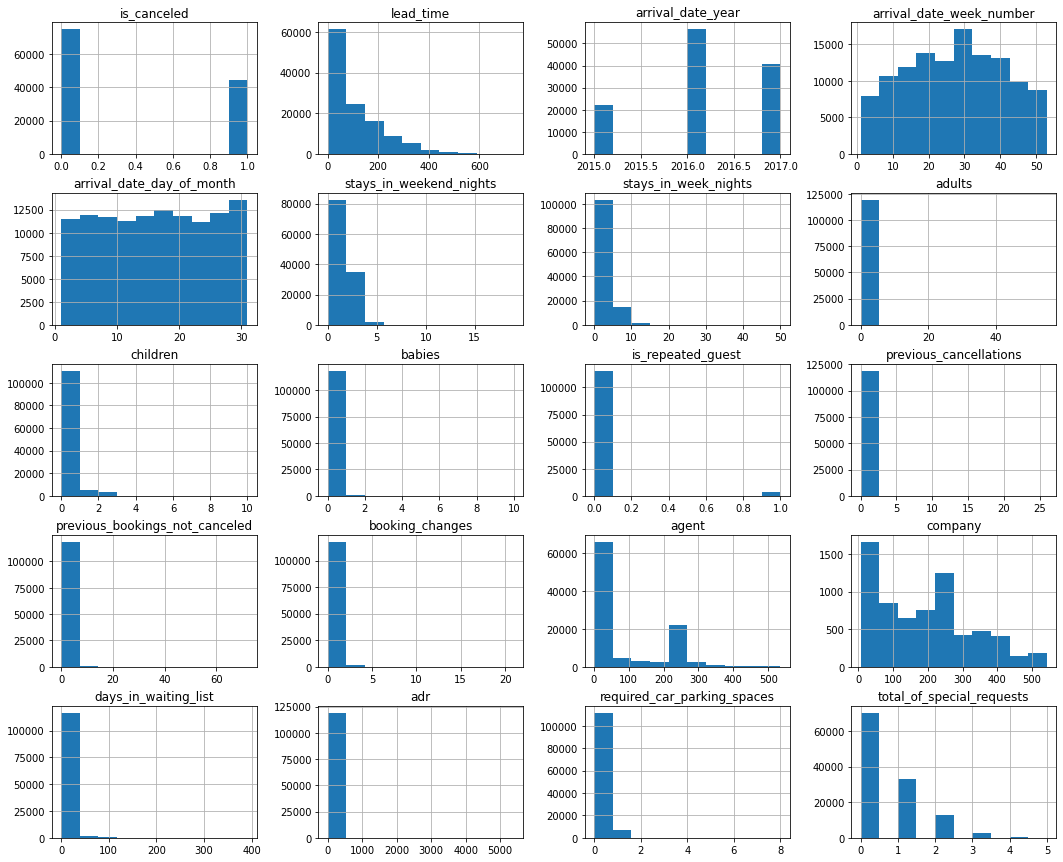

In [ ]:
# in this given graph shows the some basic graphical view
df.hist(figsize=(18,15))
plt.show()

data cleaning

In [ ]:
df.drop(columns=['company','agent'] , inplace=True)

these both columns are useless so we are delted these columns.

In [ ]:
df = df[df['adults']!=0]

In [ ]:
df = df[df['adr']>0]

In [ ]:
df['total_guest'] = df['adults']+df['babies'] + df['children']

here we have added toatal guest column which will helps us to calculate total guest.

In [ ]:
df['arival_date'] = df['arrival_date_year'].astype(str)+ ' ' + df['arrival_date_month'].astype(str)+ ' ' + df['arrival_date_day_of_month'].astype(str)

In [ ]:
df['arival_date'] = pd.to_datetime(df['arival_date'])

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guest,arival_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,2.0,2015-07-01
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,2.0,2015-07-01
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,0,Transient,107.00,0,0,Check-Out,2015-07-03,2.0,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,2.0,2017-08-30
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,3.0,2017-08-31
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,2.0,2017-08-31
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,2.0,2017-08-31


here we have created a new column which provide the arrival date of customers.
further it will help us to get some isights.its also show the exact date of customer arrival.

In [ ]:
df.drop(['arrival_date_week_number'], axis =1 , inplace=True)

lets fill the some null values

In [ ]:
df['country'].mode()

0    PRT
dtype: object

In [ ]:
df['country'].fillna(df['country'].mode()[0], inplace = True)

In [ ]:
df['children'].fillna(df['children'].median(), inplace=True)

In [ ]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

so now there is no column with null value . now whole data is cleaned.

#Exploring and Visualizing Data
Exploring the data by analyzing its statistics and visualizing the values of features and correlations between different features. Explaining the process and the results


Now that we are ready for an exploration of our data, we can make a rule that we are going to be working from left to right. The reason some may prefer to do this is due to its set approach - some datasets have a big number of attributes, plus this way we will remember to explore each column individually to make sure we learn as much as we can about our dataset.

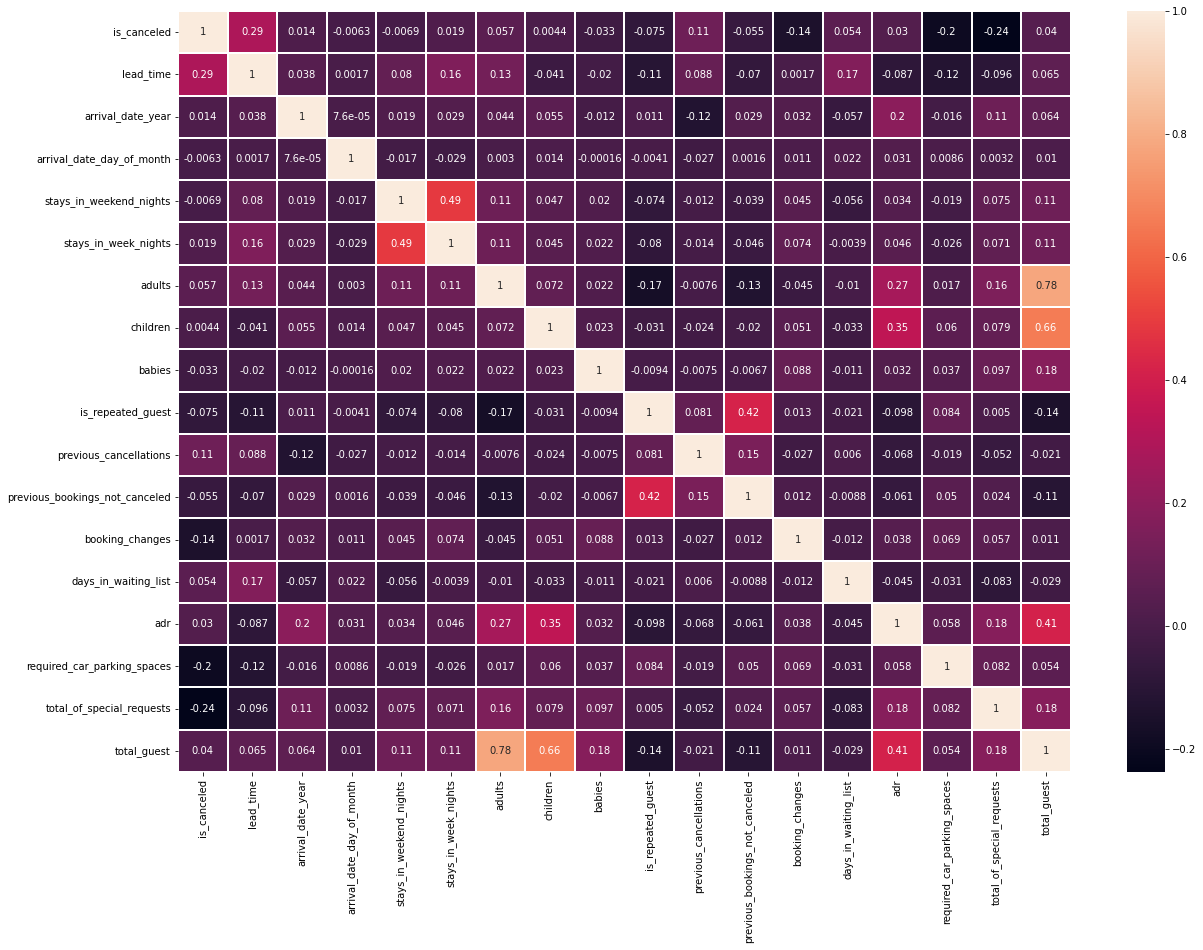

In [ ]:
plt.figure(figsize=(20,14))
cor = df.corr()
sns.heatmap(cor, annot = True ,linewidths = 1)
plt.show()

its show the correlation between all information

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


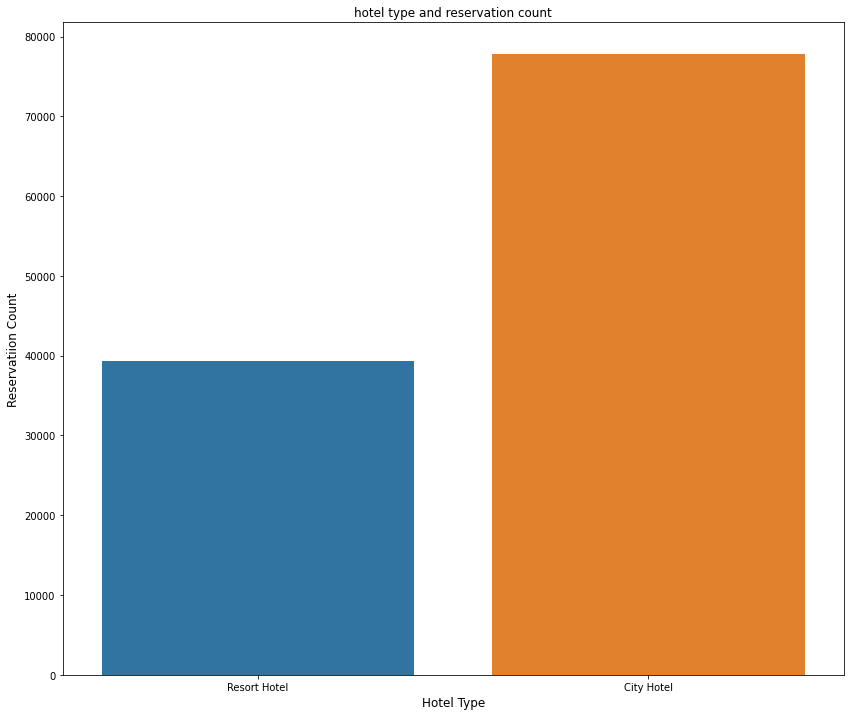

In [ ]:
plt.figure(figsize=(14,12))
graph = sns.countplot('hotel', data=df)
graph.set(title = "hotel type and reservation count")
graph.set_xlabel('Hotel Type', fontsize=12)
graph.set_ylabel('Reservatiion Count', fontsize=12)
plt.show()

it show the which kind of hotel have most. so resort hotel have lesser as compare to City hotel
Understanding unique values and categorical data that we have in our dataset was the last step we had to do. It looks like for those columns' values we will be doing some mapping to prepare the dataset for predictive analysis.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


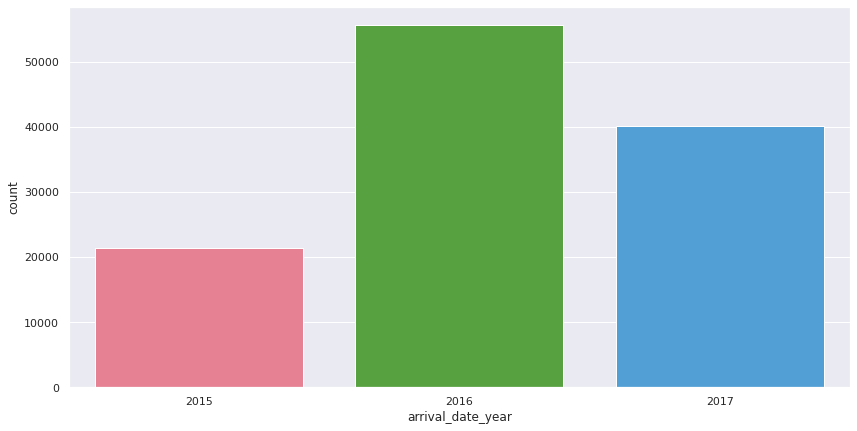

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['arrival_date_year'], palette='husl')
plt.show()

on the basis of year we get that 2016 was boom in hotel booking

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


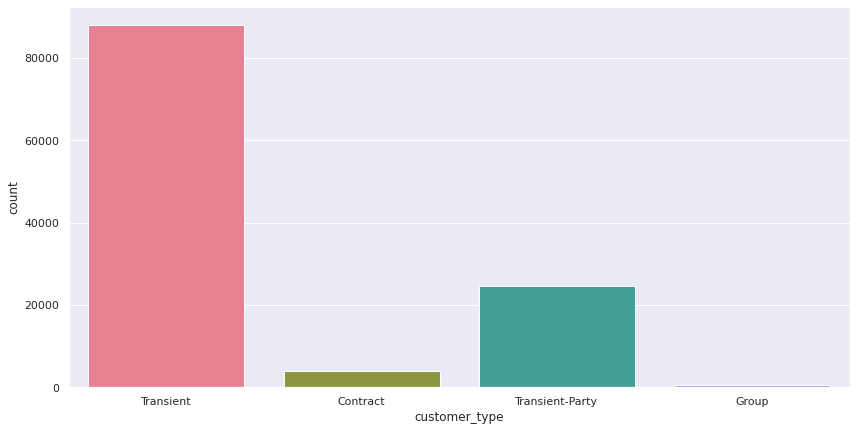

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['customer_type'], palette='husl')
plt.show()

on the basis of type of customer we have checked shich type of cutomer visited most

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


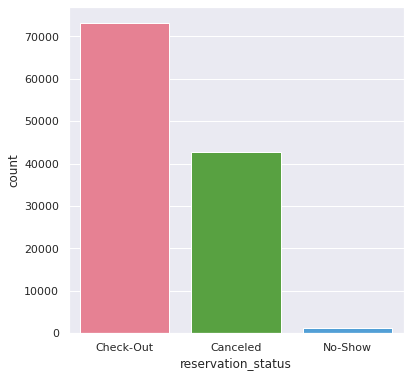

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(df['reservation_status'], palette='husl')
plt.show()

on the basis of reservatin status we can see almost 50% cutomers are cancelled the booking

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


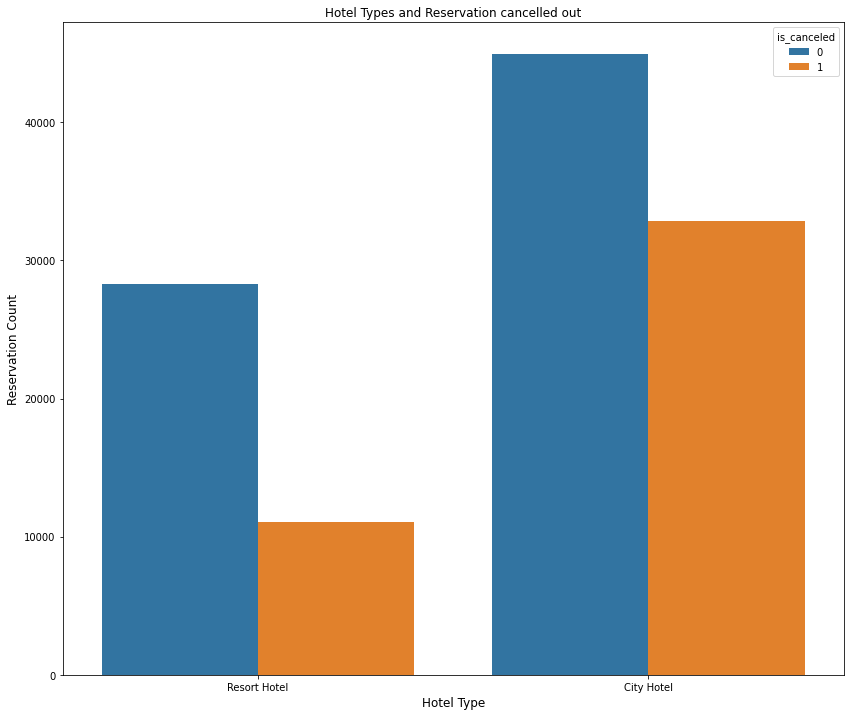

In [ ]:
plt.figure(figsize=(14,12))
graph = sns.countplot('hotel', hue='is_canceled', data = df)
graph.set(title = "Hotel Types and Reservation cancelled out")
graph.set_xlabel('Hotel Type', fontsize=12)
graph.set_ylabel('Reservation Count', fontsize = 12)
plt.show()

in this given graph show the hotel type and also show the corresponding cancelation as well.

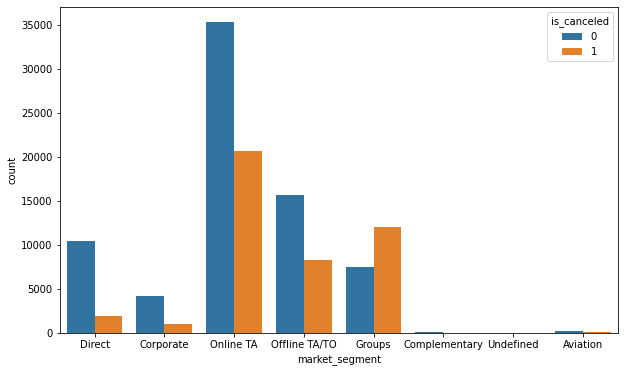

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data = df , x = 'market_segment', hue='is_canceled')
plt.show()

this graph is showing the different markent segment which segment effect the most. according to graph online TA is the most effective.

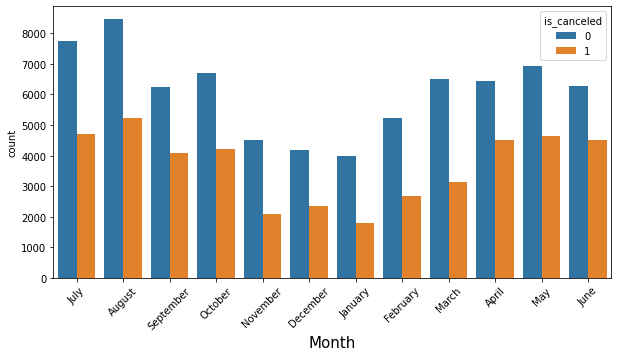

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df , x = 'arrival_date_month', hue = 'is_canceled')
plt.xlabel('Month', fontsize=15)
plt.xticks(rotation =45 , fontsize = 10)
plt.show()

as in this given graph shows the cancelation rate.From the chart above, it seems that in winter (November - January) Reservation Count decline for both hotels and rose up again gradually after winter, and the hotel reservation tends to peak during July - August for both hotels

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Reservation Count')

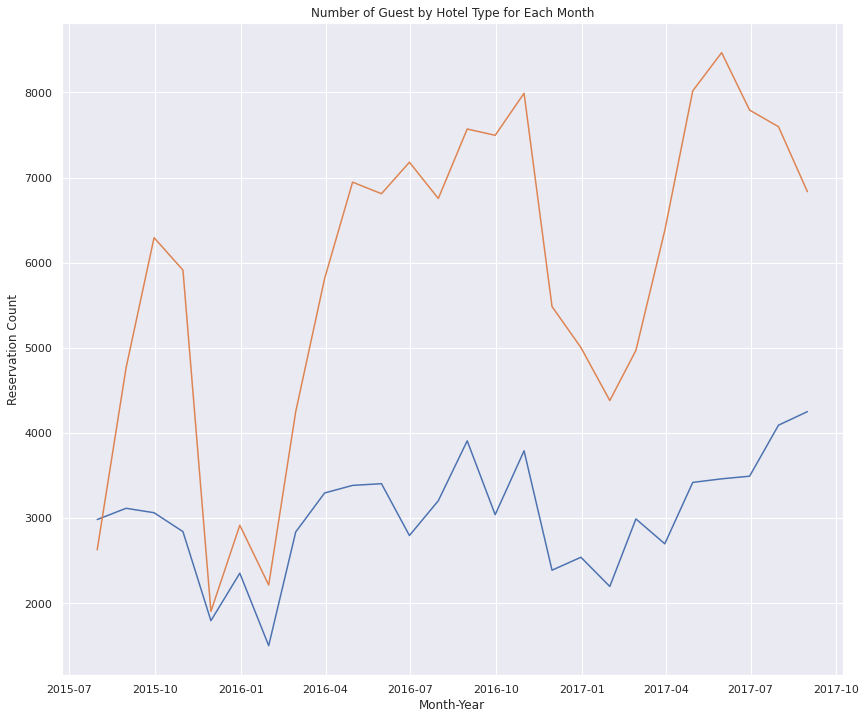

In [ ]:

sns.set(rc={'figure.figsize':(14,12)})
fig, ax = plt.subplots()
data_resort = df[df['hotel'] == 'Resort Hotel'].groupby(pd.Grouper(key='arival_date', axis=0, freq='M')).sum().reset_index()
data_city = df[df['hotel'] == 'City Hotel'].groupby(pd.Grouper(key='arival_date', axis=0, freq='M')).sum().reset_index() 
sns.lineplot('arival_date', 'total_guest', data=data_resort, ax=ax)
sns.lineplot('arival_date', 'total_guest', data=data_city, ax=ax)
ax.set(title='Number of Guest by Hotel Type for Each Month')
ax.set_xlabel('Month-Year', fontsize=12)
ax.set_ylabel('Reservation Count', fontsize=12)

in this graph show the data of each month. in each month how many customers are visit and also showing their corresponding hotel names.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Parking Spaces Needs')

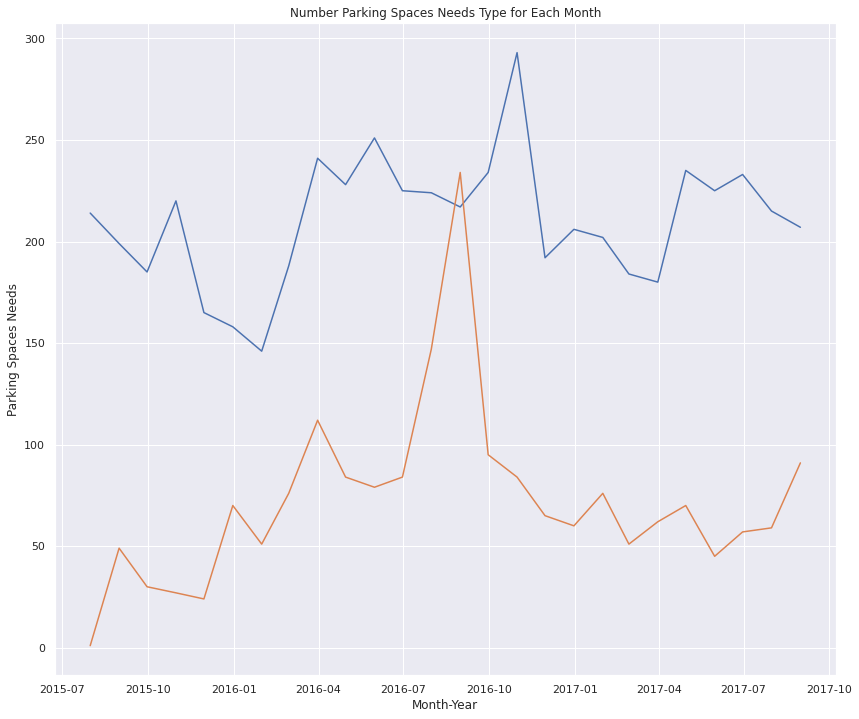

In [ ]:
sns.set(rc={'figure.figsize':(14,12)})
fig, ax = plt.subplots()
data_resort = df[df['hotel'] == 'Resort Hotel'].groupby(pd.Grouper(key='arival_date', axis=0, freq='M')).sum().reset_index()
data_city = df[df['hotel'] == 'City Hotel'].groupby(pd.Grouper(key='arival_date', axis=0, freq='M')).sum().reset_index() 
sns.lineplot('arival_date', 'required_car_parking_spaces', data=data_resort, ax=ax)
sns.lineplot('arival_date', 'required_car_parking_spaces', data=data_city, ax=ax)
ax.set(title='Number Parking Spaces Needs Type for Each Month')
ax.set_xlabel('Month-Year', fontsize=12)
ax.set_ylabel('Parking Spaces Needs', fontsize=12)

its show the need of parking space in each months.incase of peak months we have nneed to inhance the hotel parking space.with this graph we can check where we need to inrease our parking area.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


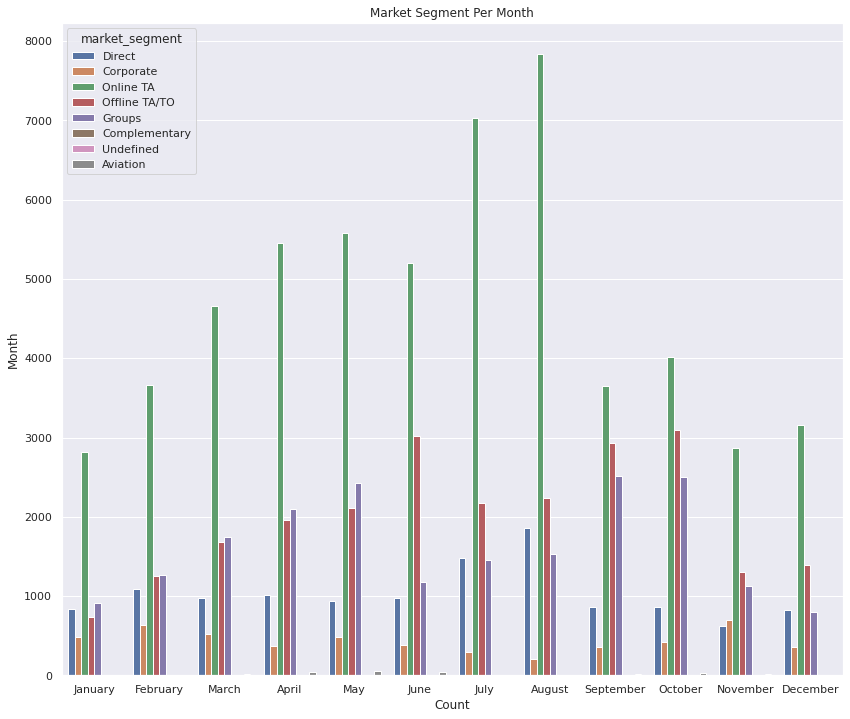

In [ ]:
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.set(rc={'figure.figsize':(14,12)})
graph = sns.countplot('arrival_date_month', hue='market_segment', data=df, order=order)
graph.set(title='Market Segment Per Month')
graph.set_xlabel('Count', fontsize = 12)
graph.set_ylabel('Month', fontsize = 12)
plt.show()

market segment on the basis of months. as in every indivisual month have each kind of segments and also show the which segment is effects the most.
according this graph in every month online Ta segment effect the most.

Which are the three most common and uncommon countries of origin?

In [ ]:
print('Most common countries:')
print(df.country.value_counts().head(3))
print('-'*50)
print('\n Most uncommon countries:')
print(df.country.value_counts().tail(35))

Most common countries:
PRT    47456
GBR    12037
FRA    10335
Name: country, dtype: int64
--------------------------------------------------

 Most uncommon countries:
TGO    2
UGA    2
KNA    2
RWA    2
SYC    2
KIR    1
NCL    1
SDN    1
AIA    1
ASM    1
FJI    1
LCA    1
GUY    1
PYF    1
DMA    1
ATF    1
SLE    1
MRT    1
NIC    1
BDI    1
PLW    1
MLI    1
MDG    1
BFA    1
CYM    1
MMR    1
NPL    1
BHS    1
UMI    1
SMR    1
DJI    1
HND    1
BWA    1
VGB    1
NAM    1
Name: country, dtype: int64


As we can see, Portugal tops the list with 48,586 of the cases, followed by Great Britain with 12,129 and France with 10,415.

There are 30 countries that can be considered as the most uncommon country of origin, with 1 guest per country. Among these, we have Madagascar, Dominica, Mali, Guyana, Palau, Kiribati, Sudan, etc.

 Which are the months of highest and least occupation?

In [ ]:
df.arrival_date_month.value_counts(normalize=True)

August       0.116716
July         0.106305
May          0.098923
April        0.093282
October      0.093129
June         0.092207
September    0.088222
March        0.082095
February     0.067425
November     0.056570
December     0.055785
January      0.049342
Name: arrival_date_month, dtype: float64

The month of highest occupation is august with 11.65% of the reservations. The month of lest occupation is january with 4.94% of the reservations.

What is the most common customer type?


In [ ]:
df.customer_type.value_counts(normalize=True)

Transient          0.750977
Transient-Party    0.209827
Contract           0.034570
Group              0.004625
Name: customer_type, dtype: float64

#Conclusion
Summarizing our findings, suggesting other features

The majority of guests come from western europe countries.
the majority of reservations are for city hotels.
The number of repeated guests is too low.
The majority of reservations converts into successful transactions.
Firstly, higher lead time has higher chance of cancellation. Also, history of previous cancellations increases chances of cancellation.

Secondly, The City hotel has more guests during spring and autumn, when the prices are also highest, In July and August there are less visitors, although prices are lower. Thus, customers can get good deal on bookings in July and August in city hotel.

Guest numbers for the Resort hotel go down slighty from June to September, which is also when the prices are highest. Thus, these months should be avoided for bookings.

Thirdly, Broadly, Arpil to August is the peak season of bookings. Both hotels have the fewest guests during the winter.

Fourthly, No deposit cancellations are high compared to other categories but these should not be discouraged per se as bookings in this category are also very high compared to non refundable type bookings.

Fifthly, cancellations are high when done through agents compared to direct bookings. Hotels need to do marketing and give special incentives for direct bookings as these may establish personal one to one relationships promoting customer loyalty.